<h1 style="color: #0000FF">PREMIERE PROJECT : Predicting Survival of Tongue Cancer Patients</h1>


Team Python
© 2023 Hamoye Data Science Internship

---

I, **Oladimeji WILLIAMS**, confirm - by submitting this document - that the solutions in this notebook are a result of my team's work (team Python), and that I abide by the [Code of Conduct](https://drive.google.com/file/d/1sbR80aowp1daCnElwx3kNm0fxids0e6b/view) contained therein.

### Overview: Predicting Survival of Tongue Cancer Patients
> The [repository](https://zenodo.org/record/7450476/files/tongue.csv?download=1) contains the dataset used in the paper **Predicting Survival of Tongue Cancer Patients by Machine Learning Models**. The dataset contains information on **1,712** tongue cancer curative surgery recipients. Each row represents one patient. The meaning of each variable is summarized here:

**Attribute Information:**
1. `id`: patient identifier
2. `gender`: patient sex
3. `survival`: patient survival status at follow-up; 0: survival, 1: death
4. `follow_time`: length of follow-up period in days
5. `part`: site of operation
6. `stage`: tumor stage; 0: very small, no spreading, 1: small, no spreading, 2: some growth, spreading, 3: large, spreading to surrounding tissue or lymph nodes, 4A/4B/4C: larger, metastasis to at least one other organ
7. `op`: operation status; 1: complete
8. `rt`: radiation therapy status; 0: not received, 1: received
9. `ct`: chemotherapy status; 0: not received, 1: received
10. `t_stage`: tumor size; 1 (small) to 4 (large)
11. `n_stage`: metastasis to lymph nodes; 0 (no metastasis) to 3 (metastasis to multiple lymph nodes)
12. `grade`: tumor grade; 1 (no proliferation) to 3 (aggressive proliferation)


- **The supporting visualization of this project is on [Power BI](https://app.powerbi.com/view?r=eyJrIjoiNDJiYjVlYzQtM2QyNS00ZTE5LTg4MDMtOGM3ZWEyMzlmZTZjIiwidCI6IjU0NjJmMDc4LWFiYTgtNDE1OS05MWYwLWVhODg1MmJjOTU4NCJ9).**
- **The supporting presentation deck is hosted on [Canva](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**
- **The report on this ingenius project is hosted on [Google Docs](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**
- **This code is hosted on [GitHub](https://www.canva.com/design/DAFJ9cXZSTM/w4seT4KLSbzOLsHxh3VfKg/view?utm_content=DAFJ9cXZSTM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).**


<img src="https://1000logos.net/wp-content/uploads/2022/04/Breast-Cancer-Logo-500x281.png" alt="Cancer Symbol" width="500" height="280">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1869px-Python-logo-notext.svg.png" alt="Python Symbol" width="280" height="280">


<h1 style="color: #0000FF">Problem Statement</h1>

> Tongue cancer is a prevalent form of malignancy that affects the oral cavity, originating in the mouth and throat. The diagnosis, treatment, and management of this disease have been areas of active research and development. Current approaches to treatment typically involve surgical removal, chemotherapy, and radiation therapy, which have been the primary modalities used to address tongue cancer. The effectiveness of these treatments is closely associated with patients' survival outcomes. Traditional studies have relied on descriptive statistics to identify survival and risk factors, potentially overlooking complex and nonlinear relationships among clinical and demographic variables.
>
> The comprehensive problem at hand is to develop a data-driven approach utilizing cutting-edge machine learning models and clinical data to accurately predict the survival of tongue cancer patients following treatment. By leveraging advanced techniques, we aim to address the limitations of traditional statistical approaches and enhance our ability to estimate patients' survival status.
>
> Specifically, our objectives include:
>
> 1. Building a robust predictive model that incorporates a wide range of clinical and demographic variables to capture the complexity of tongue cancer and its impact on survival outcomes.
> 2. Employing state-of-the-art machine learning models, such as Ridge regression, Lasso regression, Random Forest, Gradient Boosting, and Support Vector Machines, to explore the nonlinear relationships and interactions among the variables.
> 3. Applying rigorous evaluation methods, such as five-fold cross-validation, bootstrap analysis, and permutation feature importance, to estimate the performance of the predictive model and ensure its reliability.
> 4. Comparing the performance of different machine learning models and identifying the most accurate and interpretable approach for survival prediction in tongue cancer.
> 5. Interpreting the model results and identifying the significant prognostic factors associated with survival in tongue cancer patients, providing valuable insights for clinicians and researchers.
> 6. Validating the model's findings by comparing them with previous clinical studies to assess the consistency and reliability of our data-driven approach.
>
> The successful accomplishment of these objectives will contribute to improved tongue cancer treatment and management by providing clinicians with a reliable, accurate, and interpretable tool for predicting patients' survival outcomes. This data-driven approach can serve as additional evidence to support clinical decision-making, enhance personalized treatment strategies, and ultimately improve patient care and outcomes in the context of tongue cancer.

<h5 style="color: red">Install Additional Libraries</h5>

In [ ]:
# Install necessary modules
# !pip install powerbiclient
!pip install lazypredict
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.6 MB/s eta 0:00:00


<h5 style="color: red">Import All Neccessary Libraries</h5>

In [ ]:
# Load All Possible Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
# from powerbiclient import Report, models
# from powerbiclient.authentication import DeviceCodeLoginAuthentication
import random
import pickle as pk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#Load dataset
df = pd.read_csv('tongue.csv')

In [ ]:
#Copy the dataset from one variable to another variable
df_copy = df.copy()

In [ ]:
# #Renaming the column
# df = df.rename(columns = {"op": "operation_status", "rt": "radiation_therapy", "ct": "chemotherapy_status"})

In [ ]:
df.head()

,Unnamed: 0,id,gender,age,survival,follow_time,part,stage,op,rt,ct,t_stage,n_stage,grade
0,1,1,M,50,1,1504,tongue,2,1,0,0,2,0,1
1,2,2,M,57,1,2011,tongue,1,1,0,0,1,0,1
2,3,3,M,53,0,341,tongue,2,1,0,0,2,0,2
3,4,4,M,49,1,508,tongue,1,1,0,0,1,0,2
4,5,5,M,75,0,992,tongue,4,1,1,0,2,2,3


<h1 style="color: #0000FF">Check Unique Values In Each Column</h1>

In [ ]:
df['gender'].nunique()

2

In [ ]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['part'].nunique()

1

In [ ]:
df['survival'].nunique()

2

In [ ]:
df['survival'].unique()

array([1, 0])

In [ ]:
df['stage'].nunique()

4

In [ ]:
df['stage'].unique()

array([2, 1, 4, 3])

In [ ]:
df['op'].nunique()

1

In [ ]:
df['rt'].nunique()

2

In [ ]:
df['rt'].unique()

array([0, 1])

In [ ]:
df['ct'].nunique()

2

In [ ]:
df['ct'].unique()

array([0, 1])

In [ ]:
df['t_stage'].nunique()

4

In [ ]:
df['t_stage'].unique()

array([2, 1, 3, 4])

In [ ]:
df['n_stage'].nunique()

4

In [ ]:
df['n_stage'].unique()

array([0, 2, 1, 3])

In [ ]:
df['grade'].nunique()

3

In [ ]:
df['grade'].unique()

array([1, 2, 3])

In [ ]:
# Drop Unuseful columns
df = df.drop(columns=["Unnamed: 0", "id", "part"], axis=0)

In [ ]:
df.head()

,gender,age,survival,follow_time,stage,op,rt,ct,t_stage,n_stage,grade
0,M,50,1,1504,2,1,0,0,2,0,1
1,M,57,1,2011,1,1,0,0,1,0,1
2,M,53,0,341,2,1,0,0,2,0,2
3,M,49,1,508,1,1,0,0,1,0,2
4,M,75,0,992,4,1,1,0,2,2,3


<h1 style="color: #0000FF">Bivariate and Multivariate Relationships</h1>

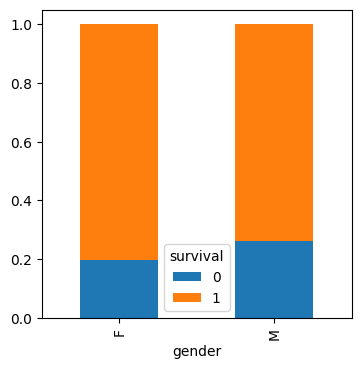

In [ ]:
gender = pd.crosstab(df['gender'],df['survival'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Text(0, 0.5, 'percentage')

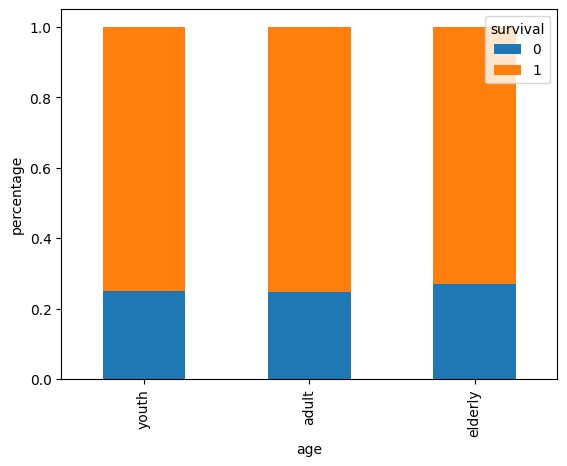

In [ ]:
bins = [0, 30, 60, 100]
groups = ['youth', 'adult', 'elderly']
df['age_bin'] = pd.cut(df['age'], bins, labels=groups)
age_bin = pd.crosstab(df['age_bin'],df['survival'])
age_bin.div(age_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked='True')
plt.xlabel('age')
plt.ylabel('percentage')

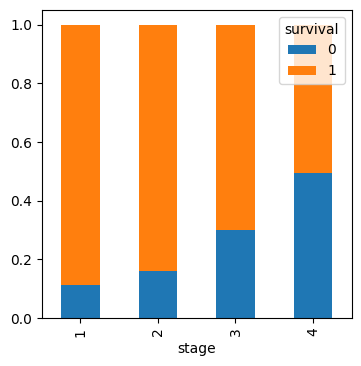

In [ ]:
stage = pd.crosstab(df['stage'],df['survival'])
stage.div(stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

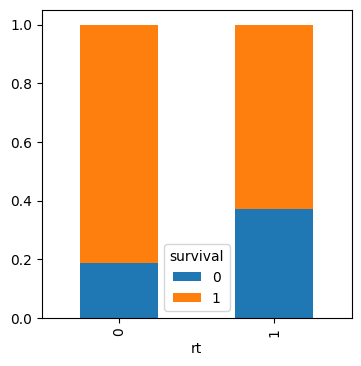

In [ ]:
rt = pd.crosstab(df['rt'],df['survival'])
rt.div(rt.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

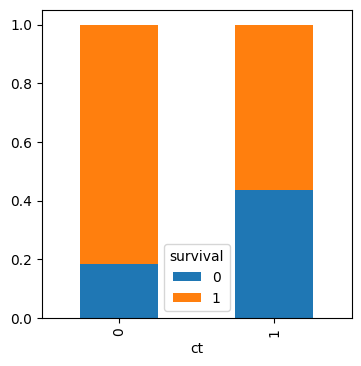

In [ ]:
ct = pd.crosstab(df['ct'],df['survival'])
ct.div(ct.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

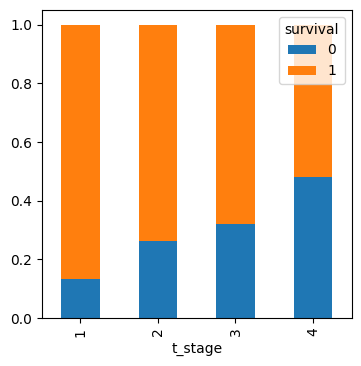

In [ ]:
t_stage = pd.crosstab(df['t_stage'],df['survival'])
t_stage.div(t_stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

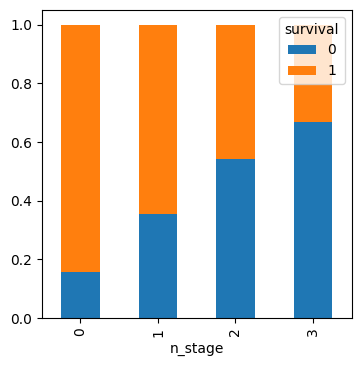

In [ ]:
n_stage = pd.crosstab(df['n_stage'],df['survival'])
n_stage.div(n_stage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

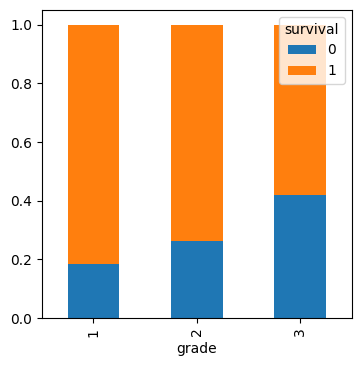

In [ ]:
grade = pd.crosstab(df['grade'],df['survival'])
grade.div(grade.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<h1 style="color: #0000FF">Further Visualizations on Power BI</h1>

<h5 style="color: red">Unfortunately, we need a pro account to use this `powerbiclient` service</h5>

`auth = DeviceCodeLoginAuthentication()`

- `group_id = "19f7a701-498e-4397-aa25-e512c2238614"`
- `report_id = "cad908fa-c163-48e3-a1cb-b363864d9220"`

- `report = Report(group_id = group_id, report_id = report_id, auth = device_auth)`
- `report`

<h1 style="color: #0000FF">Further Processing for Machine Learning</h1>

In [ ]:
# Encode `gender` column
encoding = {"M": 0, "F": 1}
df['gender'] = df['gender'].map(encoding)

<h1 style="color: #0000FF">Feature Selection</h1>

In [ ]:
# Separate Features from Label
X = df[['gender', 'age', 'grade', 'follow_time', 'stage', 'op', 'rt', 'ct',
       't_stage', 'n_stage', 'grade']]
y = df["survival"]

In [ ]:
# Select top 7 important features
selector = SelectKBest(mutual_info_classif, k=7)
x_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the selected features
feature_names = X.columns[selected_features]

# Print the names of the selected features
print(feature_names)

Index(['grade', 'follow_time', 'stage', 'rt', 'ct', 't_stage', 'n_stage'], dtype='object')


In [ ]:
# Check the most important features using the `f_score`
f_scores, p_values = f_classif(X, y)
f_scores_df = pd.DataFrame({'Feature_Name': X.columns, 'f_score': f_scores, 'p_value': p_values})
f_scores_df.sort_values(by='f_score', ascending=False, inplace=True)
print(f_scores_df)

   Feature_Name  f_score  p_value
3   follow_time   551.95     0.00
9       n_stage   245.75     0.00
4         stage   244.97     0.00
8       t_stage   135.96     0.00
7            ct   125.30     0.00
6            rt    73.97     0.00
2         grade    35.47     0.00
10        grade    35.47     0.00
0        gender     3.83     0.05
1           age     2.66     0.10
5            op      NaN      NaN


In [ ]:
# Check the most important features using the `chi-square`
chi_scores, p_values = chi2(X,y)
results = pd.DataFrame({'Feature_Name': X.columns,'chi-square':chi_scores,'p-value': p_values})
results.sort_values(by='chi-square', ascending=False, inplace=True)
print(results)

   Feature_Name  chi-square  p-value
3   follow_time   174450.28     0.00
9       n_stage      280.68     0.00
4         stage      136.06     0.00
7            ct       84.86     0.00
8       t_stage       68.89     0.00
6            rt       45.61     0.00
2         grade        6.87     0.01
10        grade        6.87     0.01
1           age        6.53     0.01
0        gender        3.36     0.07
5            op        0.00     1.00


In [ ]:
p_values_df = pd.Series(p_values, index = X.columns)
p_values_df.sort_values(ascending = False, inplace = True)

In [ ]:
p_values_df

op            1.00
gender        0.07
age           0.01
grade         0.01
grade         0.01
rt            0.00
t_stage       0.00
ct            0.00
stage         0.00
n_stage       0.00
follow_time   0.00
dtype: float64

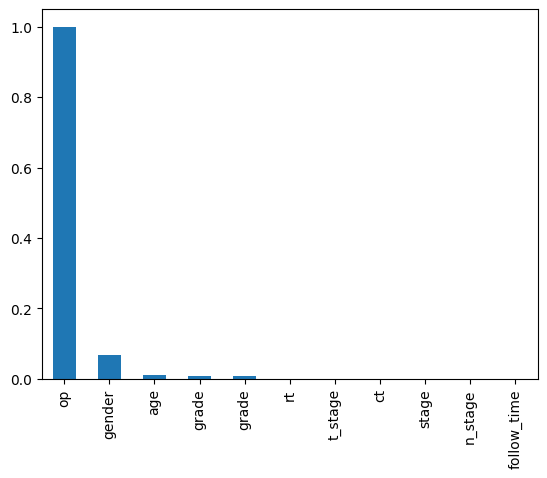

In [ ]:
# Print the bar chart of the p-values
p_values_df.plot.bar()
plt.show()

<h5 style="color: red">The higher the bars, the less likely the feature contributes to the label</h5>

<h5 style="color: red">`op` and `gender` are subsequently deselected</h5>

In [ ]:
X = df[['age', 'grade', 'rt', 't_stage', 'ct', 'stage', 'n_stage', 'follow_time']]
y = df["survival"]

<h3 style="color: red">Check for Multicollinearity Using Variance Inflation Factor (VIF)</h3>

We used the following rules of thumb for interpreting `VIF` values:

- `VIF = 1`: There is no correlation between a given predictor variable and any other predictor variables in the model.
- `VIF between 1 and 5`: There is moderate correlation between a given predictor variable and other predictor variables in the model.
- `VIF > 5`: There is severe correlation between a given predictor variable and other predictor variables in the model.

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [ ]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
5,stage,38.67
3,t_stage,19.94
0,age,11.09
1,grade,8.15
6,n_stage,4.88
7,follow_time,3.41
4,ct,3.19
2,rt,3.06


<h5 style="color: red">We deselect `stage`</h5>

In [ ]:
# Feature selection
X = df[['age', 'grade', 'rt', 't_stage', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [ ]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
0,age,10.27
1,grade,8.11
3,t_stage,6.15
6,follow_time,3.40
4,ct,3.19
2,rt,2.89
5,n_stage,2.66


<h5 style="color: red">We deselect `age`</h5>

In [ ]:
# Feature selection
X = df[['grade', 'rt', 't_stage', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

In [ ]:
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [ ]:
vif_df.sort_values(by='VIF', ascending = False)

,feature,VIF
2,t_stage,5.37
0,grade,4.87
3,ct,3.17
5,follow_time,2.88
1,rt,2.88
4,n_stage,2.66


<h5 style="color: red">So our acceptable features are `t_stage`, `grade`, `rt`, `ct`, `n_stage`, `follow_time`</h5>

In [ ]:
# Final Features
X = df[['t_stage', 'grade', 'rt', 'ct', 'n_stage', 'follow_time']]
y = df["survival"]

In [ ]:
# evaluating functions
def evaluate_models1(x_train, y_train, x_val, y_val):
    random_seed= 0
    scores = []
    for i in range(len(models) - 1):
        model = models[i +1]
        model.fit(X_train, y_train)
        y_predicted = model.predict(x_val)
        accuracy = accuracy_score(y_val, y_predicted)
        f1score = f1_score(y_val, y_predicted, average = 'weighted')
        precision = precision_score(y_val, y_predicted, average = 'weighted')
        recall = recall_score(y_val, y_predicted, average = 'weighted')
        roc_auc = roc_auc_score(y_val, y_predicted)
        scores.append({
            'model':names[i],
            'model_score':model.score(x_train, y_train),
            'accuracy' : accuracy,
            'f1_score' : f1score,
            'precision': precision,
            'recall' : recall,
            'roc_auc': roc_auc
        })
    return pd.DataFrame(scores, columns=['model','model_score','accuracy','f1_score', 'precision', 'recall', 'roc_auc'])

In [ ]:
# models = [
#     LGBMClassifier(),
#     AdaBoostClassifier(),
#     XGBClassifier(),
#     SGDClassifier(),
#     QuadraticDiscriminantAnalysis(),
#     RandomForestClassifier(),
#     BaggingClassifier(),
#     LogisticRegression(),
#     ExtraTreeClassifier(),
#     ExtraTreesClassifier(),
#     LinearSVC(),
#     DecisionTreeClassifier(),
#     PassiveAggressiveClassifier(),
#     CalibratedClassifierCV(),
#     LabelSpreading(),
#     LabelPropagation(),
#     SVC(),
#     KNeighborsClassifier(),
#     LinearDiscriminantAnalysis(),
#     NearestCentroid(),
#     GaussianNB(),
#     RidgeClassifier(),
#     RidgeClassifierCV(),
#     BernoulliNB(),
#     NuSVC(),
#     Perceptron(),
#     DummyClassifier()
# ]

In [ ]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
# # Define the hyperparameter search space for each model
# param_grid = {
#     'LGBMClassifier': {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [5, 10, 15],
#         'learning_rate': [0.01, 0.1, 0.5]
#     },
#     'AdaBoostClassifier': {
#         'n_estimators': [50, 100, 150],
#         'learning_rate': [0.01, 0.1, 1.0]
#     },
#     'XGBClassifier': {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.5]
#     },
#     'SGDClassifier': {
#         'loss': ['hinge', 'log', 'modified_huber'],
#         'alpha': [0.0001, 0.001, 0.01],
#         'penalty': ['l2', 'l1', 'elasticnet']
#     },
#     'QuadraticDiscriminantAnalysis': {},
#     'RandomForestClassifier': {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [5, 10, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True, False]
#     },
#     'BaggingClassifier': {
#         'n_estimators': [10, 50, 100],
#         'max_samples': [0.5, 1.0],
#         'max_features': [0.5, 1.0],
#         'bootstrap': [True, False]
#     },
#     'LogisticRegression': {
#         'C': [0.1, 1, 10],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear']
#     },
#     'ExtraTreeClassifier': {
#         'max_depth': [5, 10, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     'ExtraTreesClassifier': {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [5, 10, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True, False]
#     },
#     'LinearSVC': {
#         'C': [0.1, 1, 10],
#         'loss': ['hinge', 'squared_hinge'],
#         'penalty': ['l1', 'l2']
#     },
#     'DecisionTreeClassifier': {
#         'max_depth': [5, 10, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     'PassiveAggressiveClassifier': {
#         'C': [0.1, 1, 10],
#         'loss': ['hinge', 'squared_hinge']
#     },
#     'CalibratedClassifierCV': {},
#     'LabelSpreading': {},
#     'LabelPropagation': {},
#     'SVC': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf', 'poly'],
#         'gamma': ['scale', 'auto']
#     },
#     'KNeighborsClassifier': {
#         'n_neighbors': [3, 5, 7],
#         'weights': ['uniform', 'distance'],
#         'algorithm': ['auto', 'ball_tree', 'kd_tree']
#     },
#     'LinearDiscriminantAnalysis': {},
#     'NearestCentroid': {},
#     'GaussianNB': {},
#     'RidgeClassifier': {
#         'alpha': [0.1, 1, 10],
#         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
#     },
#     'RidgeClassifierCV': {
#         'alphas': [(0.1, 1, 10)],
#         'cv': [3, 5, 10],
#         'fit_intercept': [True, False]
#     },
#     'BernoulliNB': {
#         'alpha': [0.1, 1, 10],
#         'binarize': [0.0, 0.5, 1.0]
#     },
#     'NuSVC': {
#         'nu': [0.1, 0.5, 1.0],
#         'kernel': ['linear', 'rbf', 'poly'],
#         'gamma': ['scale', 'auto']
#     },
#     'Perceptron': {
#         'penalty': ['l2', 'l1', 'elasticnet'],
#         'alpha': [0.0001, 0.001, 0.01]
#     },
#     'DummyClassifier': {
#         'strategy': ['stratified', 'most_frequent', 'uniform']
#     }
# }

In [ ]:
# # Function to tune hyperparameters of each model
# def tune_models(X_train, y_train, param_grid):
#     """
#     Function to perform hyperparameter tuning of multiple models.

#     Parameters:
#         - X_train: Training data features
#         - y_train: Training data labels
#         - param_grid: Dictionary of hyperparameter search space for each model

#     Returns:
#         - best_models: Dictionary containing the best tuned models for each model
#     """
#     # Create an empty dictionary to store the best models
#     best_models = {}

#     # Perform hyperparameter tuning for each model
#     for model_name in param_grid.keys():
#         print("Tuning", model_name)

#         if model_name in globals():
#             # Get the model class dynamically
#             model = globals()[model_name]

#             # Get the hyperparameter search space for the current model
#             params = param_grid[model_name]

#             # Create an instance of RandomizedSearchCV for the current model
#             random_search = RandomizedSearchCV(model(), params, n_iter=10, cv=5, scoring='f1')

#             # Fit the model on the training data
#             random_search.fit(X_train, y_train)

#             # Get the best model and best score
#             best_model = random_search.best_estimator_

#             # Store the best model in the dictionary
#             best_models[model_name] = best_model

#             print("Best Hyperparameters:", random_search.best_params_)
#             print()

#         else:
#             print("Model", model_name, "not found.")
#             print()

#     return best_models

In [ ]:
# # Function to evaluate the performance of each model
# def evaluate_models2(X_test, y_test, best_models, metrics):
#     """
#     Function to evaluate multiple models on test data using specified metrics.

#     Parameters:
#         - X_test: Test data features
#         - y_test: Test data labels
#         - best_models: Dictionary containing the best tuned models for each model
#         - metrics: Dictionary of evaluation metrics

#     Returns:
#         - results_df: DataFrame containing the evaluation results for each model
#     """
#     results = []

#     # Evaluate the best models on the test data
#     for model_name, best_model in best_models.items():
#         print("Evaluating", model_name)

#         # Store the results in a dictionary
#         result = {'Model': model_name}

#         # Evaluate the best model on the test data for each metric
#         for metric_name, metric_func in metrics.items():
#             # Predict labels on the test data
#             y_pred = best_model.predict(X_test)

#             # Calculate the metric score
#             metric_score = metric_func(y_test, y_pred)

#             # Add the metric score to the result dictionary
#             result[metric_name] = metric_score

#         results.append(result)

#     # Convert the results to a DataFrame
#     results_df = pd.DataFrame(results)

#     return results_df

In [ ]:
# # Define the list of performance metrics
# metrics = {
#     'Accuracy': accuracy_score,
#     'Precision': precision_score,
#     'Recall': recall_score,
#     'F1 Score': f1_score
# }

In [ ]:
# best_models = tune_models(X_train, y_train, param_grid)

In [ ]:
# results_df = evaluate_models2(X_test, y_test, best_models, metrics)

In [ ]:
# execution_time = timeit.timeit(lambda: tune_models(X_train, y_train, param_grid), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

In [ ]:
# execution_time = timeit.timeit(lambda: evaluate_models(X_test, y_test, best_models, metrics), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

<h1 style="color: #0000FF">Use a Lazy Classifier to Glance the High Performing Models</h1>

In [ ]:
classifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = classifier.fit(X_train, X_val, y_train, y_val)

100%|██████████| 29/29 [00:02<00:00, 11.65it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.75,0.75,0.84,0.21
AdaBoostClassifier,0.85,0.75,0.75,0.84,0.17
XGBClassifier,0.84,0.74,0.74,0.83,0.18
SGDClassifier,0.84,0.74,0.74,0.83,0.02
RandomForestClassifier,0.83,0.74,0.74,0.83,0.35
QuadraticDiscriminantAnalysis,0.82,0.74,0.74,0.82,0.02
BaggingClassifier,0.82,0.73,0.73,0.81,0.08
LogisticRegression,0.84,0.72,0.72,0.83,0.03
ExtraTreesClassifier,0.80,0.71,0.71,0.80,0.26


In [ ]:
models.index

Index(['LGBMClassifier', 'AdaBoostClassifier', 'XGBClassifier',
       'SGDClassifier', 'RandomForestClassifier',
       'QuadraticDiscriminantAnalysis', 'BaggingClassifier',
       'LogisticRegression', 'ExtraTreesClassifier', 'LinearSVC',
       'DecisionTreeClassifier', 'PassiveAggressiveClassifier',
       'CalibratedClassifierCV', 'ExtraTreeClassifier', 'LabelPropagation',
       'LabelSpreading', 'SVC', 'KNeighborsClassifier',
       'LinearDiscriminantAnalysis', 'NearestCentroid', 'GaussianNB',
       'RidgeClassifier', 'RidgeClassifierCV', 'BernoulliNB', 'NuSVC',
       'Perceptron', 'DummyClassifier'],
      dtype='object', name='Model')

In [ ]:
# Sort the result by the performance metric of interest - `F1 Score`
models["F1 Score"].sort_values(ascending = False)

Model
AdaBoostClassifier              0.84
LGBMClassifier                  0.84
SGDClassifier                   0.83
XGBClassifier                   0.83
LogisticRegression              0.83
RandomForestClassifier          0.83
QuadraticDiscriminantAnalysis   0.82
LinearSVC                       0.81
BaggingClassifier               0.81
CalibratedClassifierCV          0.81
PassiveAggressiveClassifier     0.81
SVC                             0.80
LinearDiscriminantAnalysis      0.80
KNeighborsClassifier            0.80
ExtraTreesClassifier            0.80
LabelPropagation                0.79
LabelSpreading                  0.79
DecisionTreeClassifier          0.79
ExtraTreeClassifier             0.78
RidgeClassifier                 0.78
RidgeClassifierCV               0.78
NuSVC                           0.76
GaussianNB                      0.75
BernoulliNB                     0.74
NearestCentroid                 0.74
Perceptron                      0.73
DummyClassifier                 

In [ ]:
# Instantiate the model objects
ada_boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
lgbm_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.1, n_estimators=100, objective='binary', random_state=42)
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, learning_rate='optimal')
xgb_classifier = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
logistic_regression = LogisticRegression(C=1.0, solver='lbfgs')
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
qda = QuadraticDiscriminantAnalysis(reg_param=0.5)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=42)
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=5)
svc = SVC(C=1.0, kernel='rbf', gamma='scale')
label_propagation_model = LabelPropagation(kernel='knn', n_neighbors=3)
label_spreading = LabelSpreading(kernel='knn', n_neighbors=5, alpha=0.8)
cat_boost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

In [ ]:
models = [ada_boost_classifier, bagging_classifier, cat_boost_classifier, qda, k_neighbors_classifier,
          logistic_regression, lgbm_classifier, random_forest_classifier, sgd_classifier, svc,
          xgb_classifier, label_propagation_model, label_spreading]

names = ['AdaBoostClassifier', 'BaggingClassifier', 'CatBoostClassifier', 'QuadraticDiscriminantAnalysis',
         'KNeighborsClassifier', 'LogisticRegression', 'LGBMClassifier', 'RandomForestClassifier',
         'SGDClassifier', 'SVC', 'XGBClassifier', 'LabelPropagation', 'LabelSpreading']

In [ ]:
#Evaluate the performance of the models
result = evaluate_models1(X_train, y_train, X_val, y_val)

0:	learn: 0.6504123	total: 48.5ms	remaining: 4.8s
1:	learn: 0.6119921	total: 49.4ms	remaining: 2.42s
2:	learn: 0.5786973	total: 52.3ms	remaining: 1.69s
3:	learn: 0.5520275	total: 53.7ms	remaining: 1.29s
4:	learn: 0.5279210	total: 55.1ms	remaining: 1.05s
5:	learn: 0.5055943	total: 56.8ms	remaining: 890ms
6:	learn: 0.4861467	total: 58.3ms	remaining: 775ms
7:	learn: 0.4698648	total: 60.1ms	remaining: 691ms
8:	learn: 0.4560369	total: 62.4ms	remaining: 631ms
9:	learn: 0.4444069	total: 64.7ms	remaining: 582ms
10:	learn: 0.4327434	total: 66.5ms	remaining: 538ms
11:	learn: 0.4231990	total: 67.9ms	remaining: 498ms
12:	learn: 0.4147691	total: 69.3ms	remaining: 464ms
13:	learn: 0.4070342	total: 71.1ms	remaining: 437ms
14:	learn: 0.3997896	total: 72.7ms	remaining: 412ms
15:	learn: 0.3934041	total: 74.5ms	remaining: 391ms
16:	learn: 0.3883936	total: 76.4ms	remaining: 373ms
17:	learn: 0.3841684	total: 79.8ms	remaining: 364ms
18:	learn: 0.3802971	total: 81.4ms	remaining: 347ms
19:	learn: 0.3765098	to

In [ ]:
result['model']

0                AdaBoostClassifier
1                 BaggingClassifier
2                CatBoostClassifier
3     QuadraticDiscriminantAnalysis
4              KNeighborsClassifier
5                LogisticRegression
6                    LGBMClassifier
7            RandomForestClassifier
8                     SGDClassifier
9                               SVC
10                    XGBClassifier
11                 LabelPropagation
Name: model, dtype: object

In [ ]:
# Sort the result by the performance metric of interest `f1-score`
result.sort_values(by="f1_score", ascending = False)

,model,model_score,accuracy,f1_score,precision,recall,roc_auc
9,SVC,0.88,0.87,0.85,0.87,0.87,0.75
1,BaggingClassifier,0.88,0.86,0.85,0.86,0.86,0.76
8,SGDClassifier,0.84,0.86,0.85,0.85,0.86,0.75
6,LGBMClassifier,0.87,0.86,0.85,0.86,0.86,0.74
11,LabelPropagation,0.85,0.85,0.84,0.85,0.85,0.73
5,LogisticRegression,0.93,0.84,0.83,0.83,0.84,0.75
4,KNeighborsClassifier,0.85,0.85,0.83,0.84,0.85,0.73
3,QuadraticDiscriminantAnalysis,0.86,0.84,0.83,0.84,0.84,0.73
2,CatBoostClassifier,0.83,0.83,0.83,0.83,0.83,0.77
10,XGBClassifier,0.88,0.82,0.81,0.81,0.82,0.71


<h1 style="color: #0000FF">Create an ensemble using VotingClassifier</h1>

<h4 style="color: #0000FF">Iterate Over Several Combinations and Evaluate the Performance</h4>

In [ ]:
# Create an ensemble of `svc` and `bagging_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.76666667 0.8125     0.82083333 0.75732218 0.81171548]
Mean Score: 0.7938075313807531


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8190661478599222
Precision: 0.8791773778920309
Recall: 0.8814432989690721
F1 Score: 0.8803088803088803


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, and `sgd_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.8625     0.8625     0.84518828 0.84937238]
Mean Score: 0.8472454672245467


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8560311284046692
Precision: 0.8568181818181818
Recall: 0.9716494845360825
F1 Score: 0.9106280193236714


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, and `lgbm_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80833333 0.84166667 0.8375     0.78661088 0.82008368]
Mean Score: 0.8188389121338912


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8560311284046692
Precision: 0.8685446009389671
Recall: 0.9536082474226805
F1 Score: 0.9090909090909091


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `label_propagation_model`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                               ('LabelPropagation', label_propagation_model)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.79583333 0.85416667 0.82916667 0.79916318 0.84937238]
Mean Score: 0.8255404463040446


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8501945525291829
Precision: 0.8693586698337292
Recall: 0.9432989690721649
F1 Score: 0.9048207663782447


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `logistic_regression`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('LogisticRegression', logistic_regression)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.8375     0.84583333 0.85416667 0.85355649 0.85774059]
Mean Score: 0.8497594142259415


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8540856031128404
Precision: 0.851685393258427
Recall: 0.9768041237113402
F1 Score: 0.9099639855942376


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `logistic_regression`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('LogisticRegression', logistic_regression),
                                              ('KNeighborsClassifier', k_neighbors_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.8125     0.85       0.85833333 0.84100418 0.84937238]
Mean Score: 0.8422419804741981


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8599221789883269
Precision: 0.8640552995391705
Recall: 0.9664948453608248
F1 Score: 0.9124087591240876


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.7875     0.85       0.8625     0.83263598 0.85355649]
Mean Score: 0.8372384937238493


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8683602771362586
Recall: 0.9690721649484536
F1 Score: 0.9159561510353228


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, `k_neighbors_classifier`, and `cat_boost_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 774us	remaining: 76.7ms
1:	learn: 0.6129015	total: 5.16ms	remaining: 253ms
2:	learn: 0.5811213	total: 6.13ms	remaining: 198ms
3:	learn: 0.5506715	total: 6.56ms	remaining: 158ms
4:	learn: 0.5267948	total: 7.52ms	remaining: 143ms
5:	learn: 0.5048085	total: 8.55ms	remaining: 134ms
6:	learn: 0.4852532	total: 9.6ms	remaining: 127ms
7:	learn: 0.4692633	total: 10.6ms	remaining: 122ms
8:	learn: 0.4548821	total: 11.2ms	remaining: 114ms
9:	learn: 0.4410151	total: 12.2ms	remaining: 110ms
10:	learn: 0.4305726	total: 13ms	remaining: 105ms
11:	learn: 0.4215097	total: 13.6ms	remaining: 99.7ms
12:	learn: 0.4129459	total: 14.5ms	remaining: 97.2ms
13:	learn: 0.4051935	total: 15.6ms	remaining: 95.6ms
14:	learn: 0.3991648	total: 16.5ms	remaining: 93.5ms
15:	learn: 0.3933554	total: 17.5ms	remaining: 92.1ms
16:	learn: 0.3873205	total: 18.5ms	remaining: 90.2ms
17:	learn: 0.3825623	total: 19.3ms	remaining: 88ms
18:	learn: 0.3782678	total: 20.1ms	remaining: 85.7ms
19:	learn: 0.374280

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 996us	remaining: 98.7ms
1:	learn: 0.6119921	total: 2.6ms	remaining: 128ms
2:	learn: 0.5786973	total: 3.85ms	remaining: 125ms
3:	learn: 0.5520275	total: 4.61ms	remaining: 111ms
4:	learn: 0.5279210	total: 5.64ms	remaining: 107ms
5:	learn: 0.5055943	total: 6.48ms	remaining: 102ms
6:	learn: 0.4861467	total: 7.55ms	remaining: 100ms
7:	learn: 0.4698648	total: 8.62ms	remaining: 99.2ms
8:	learn: 0.4560369	total: 9.95ms	remaining: 101ms
9:	learn: 0.4444069	total: 11.2ms	remaining: 100ms
10:	learn: 0.4327434	total: 12.3ms	remaining: 99.3ms
11:	learn: 0.4231990	total: 12.9ms	remaining: 94.6ms
12:	learn: 0.4147691	total: 14ms	remaining: 93.6ms
13:	learn: 0.4070342	total: 15.2ms	remaining: 93.6ms
14:	learn: 0.3997896	total: 16.3ms	remaining: 92.3ms
15:	learn: 0.3934041	total: 17.4ms	remaining: 91.2ms
16:	learn: 0.3883936	total: 18.4ms	remaining: 90ms
17:	learn: 0.3841684	total: 19.2ms	remaining: 87.6ms
18:	learn: 0.3802971	total: 20.2ms	remaining: 86.3ms
19:	learn: 0.3765

In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, `k_neighbors_classifier`, and `cat_boost_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LogisticRegression', logistic_regression),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 841us	remaining: 83.3ms
1:	learn: 0.6129015	total: 2.67ms	remaining: 131ms
2:	learn: 0.5811213	total: 3.77ms	remaining: 122ms
3:	learn: 0.5506715	total: 4.51ms	remaining: 108ms
4:	learn: 0.5267948	total: 5.58ms	remaining: 106ms
5:	learn: 0.5048085	total: 6.35ms	remaining: 99.5ms
6:	learn: 0.4852532	total: 7.44ms	remaining: 98.8ms
7:	learn: 0.4692633	total: 8.48ms	remaining: 97.5ms
8:	learn: 0.4548821	total: 9.08ms	remaining: 91.9ms
9:	learn: 0.4410151	total: 10ms	remaining: 90.4ms
10:	learn: 0.4305726	total: 10.8ms	remaining: 87.6ms
11:	learn: 0.4215097	total: 11.4ms	remaining: 83.7ms
12:	learn: 0.4129459	total: 12.2ms	remaining: 82ms
13:	learn: 0.4051935	total: 13.2ms	remaining: 81.2ms
14:	learn: 0.3991648	total: 14.3ms	remaining: 80.8ms
15:	learn: 0.3933554	total: 15.3ms	remaining: 80.4ms
16:	learn: 0.3873205	total: 16.4ms	remaining: 79.9ms
17:	learn: 0.3825623	total: 17.5ms	remaining: 79.7ms
18:	learn: 0.3782678	total: 18.5ms	remaining: 79.1ms
19:	learn: 0

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 1.19ms	remaining: 117ms
1:	learn: 0.6119921	total: 2.12ms	remaining: 104ms
2:	learn: 0.5786973	total: 3.04ms	remaining: 98.3ms
3:	learn: 0.5520275	total: 3.64ms	remaining: 87.3ms
4:	learn: 0.5279210	total: 4.51ms	remaining: 85.8ms
5:	learn: 0.5055943	total: 5.18ms	remaining: 81.1ms
6:	learn: 0.4861467	total: 5.94ms	remaining: 78.9ms
7:	learn: 0.4698648	total: 6.94ms	remaining: 79.9ms
8:	learn: 0.4560369	total: 8.27ms	remaining: 83.6ms
9:	learn: 0.4444069	total: 9.4ms	remaining: 84.6ms
10:	learn: 0.4327434	total: 10.6ms	remaining: 85.4ms
11:	learn: 0.4231990	total: 11.2ms	remaining: 82.2ms
12:	learn: 0.4147691	total: 12.3ms	remaining: 82.5ms
13:	learn: 0.4070342	total: 13.1ms	remaining: 80.6ms
14:	learn: 0.3997896	total: 14ms	remaining: 79.3ms
15:	learn: 0.3934041	total: 14.8ms	remaining: 77.9ms
16:	learn: 0.3883936	total: 15.7ms	remaining: 76.7ms
17:	learn: 0.3841684	total: 17ms	remaining: 77.5ms
18:	learn: 0.3802971	total: 18ms	remaining: 76.9ms
19:	learn: 0

In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                              ('LGBMClassifier', lgbm_classifier),
                                              ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 818us	remaining: 81ms
1:	learn: 0.6129015	total: 2.21ms	remaining: 108ms
2:	learn: 0.5811213	total: 3.81ms	remaining: 123ms
3:	learn: 0.5506715	total: 5.22ms	remaining: 125ms
4:	learn: 0.5267948	total: 6.31ms	remaining: 120ms
5:	learn: 0.5048085	total: 7.19ms	remaining: 113ms
6:	learn: 0.4852532	total: 8.26ms	remaining: 110ms
7:	learn: 0.4692633	total: 9.33ms	remaining: 107ms
8:	learn: 0.4548821	total: 9.9ms	remaining: 100ms
9:	learn: 0.4410151	total: 10.9ms	remaining: 98ms
10:	learn: 0.4305726	total: 11.7ms	remaining: 94.4ms
11:	learn: 0.4215097	total: 12.2ms	remaining: 89.6ms
12:	learn: 0.4129459	total: 13.3ms	remaining: 88.7ms
13:	learn: 0.4051935	total: 14.3ms	remaining: 87.8ms
14:	learn: 0.3991648	total: 15.6ms	remaining: 88.2ms
15:	learn: 0.3933554	total: 16.5ms	remaining: 86.7ms
16:	learn: 0.3873205	total: 17.6ms	remaining: 85.8ms
17:	learn: 0.3825623	total: 18.8ms	remaining: 85.5ms
18:	learn: 0.3782678	total: 20.1ms	remaining: 85.6ms
19:	learn: 0.3742

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 978us	remaining: 96.9ms
1:	learn: 0.6119921	total: 1.81ms	remaining: 88.9ms
2:	learn: 0.5786973	total: 2.66ms	remaining: 86ms
3:	learn: 0.5520275	total: 3.09ms	remaining: 74.2ms
4:	learn: 0.5279210	total: 3.82ms	remaining: 72.6ms
5:	learn: 0.5055943	total: 4.37ms	remaining: 68.5ms
6:	learn: 0.4861467	total: 5.09ms	remaining: 67.7ms
7:	learn: 0.4698648	total: 5.92ms	remaining: 68.1ms
8:	learn: 0.4560369	total: 6.96ms	remaining: 70.4ms
9:	learn: 0.4444069	total: 7.79ms	remaining: 70.1ms
10:	learn: 0.4327434	total: 8.61ms	remaining: 69.7ms
11:	learn: 0.4231990	total: 8.96ms	remaining: 65.7ms
12:	learn: 0.4147691	total: 10.4ms	remaining: 69.3ms
13:	learn: 0.4070342	total: 11.4ms	remaining: 70.2ms
14:	learn: 0.3997896	total: 12.6ms	remaining: 71.3ms
15:	learn: 0.3934041	total: 13.7ms	remaining: 71.9ms
16:	learn: 0.3883936	total: 14.7ms	remaining: 71.6ms
17:	learn: 0.3841684	total: 15.4ms	remaining: 70.4ms
18:	learn: 0.3802971	total: 16.4ms	remaining: 69.9ms
19:	le

In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('XGBClassifier', xgb_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 3.19ms	remaining: 316ms
1:	learn: 0.6129015	total: 6.9ms	remaining: 338ms
2:	learn: 0.5811213	total: 8.54ms	remaining: 276ms
3:	learn: 0.5506715	total: 9.03ms	remaining: 217ms
4:	learn: 0.5267948	total: 9.8ms	remaining: 186ms
5:	learn: 0.5048085	total: 11.6ms	remaining: 182ms
6:	learn: 0.4852532	total: 12.4ms	remaining: 165ms
7:	learn: 0.4692633	total: 13.3ms	remaining: 153ms
8:	learn: 0.4548821	total: 13.6ms	remaining: 138ms
9:	learn: 0.4410151	total: 14.5ms	remaining: 130ms
10:	learn: 0.4305726	total: 15.1ms	remaining: 122ms
11:	learn: 0.4215097	total: 15.4ms	remaining: 113ms
12:	learn: 0.4129459	total: 16.3ms	remaining: 109ms
13:	learn: 0.4051935	total: 17.2ms	remaining: 106ms
14:	learn: 0.3991648	total: 18.6ms	remaining: 105ms
15:	learn: 0.3933554	total: 19.5ms	remaining: 102ms
16:	learn: 0.3873205	total: 20.3ms	remaining: 98.9ms
17:	learn: 0.3825623	total: 21.7ms	remaining: 98.7ms
18:	learn: 0.3782678	total: 23.1ms	remaining: 98.3ms
19:	learn: 0.3742806	

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 1.05ms	remaining: 104ms
1:	learn: 0.6119921	total: 4.67ms	remaining: 229ms
2:	learn: 0.5786973	total: 6.14ms	remaining: 199ms
3:	learn: 0.5520275	total: 7.45ms	remaining: 179ms
4:	learn: 0.5279210	total: 8.12ms	remaining: 154ms
5:	learn: 0.5055943	total: 8.87ms	remaining: 139ms
6:	learn: 0.4861467	total: 9.94ms	remaining: 132ms
7:	learn: 0.4698648	total: 10.8ms	remaining: 124ms
8:	learn: 0.4560369	total: 11.9ms	remaining: 121ms
9:	learn: 0.4444069	total: 13ms	remaining: 117ms
10:	learn: 0.4327434	total: 14.1ms	remaining: 114ms
11:	learn: 0.4231990	total: 14.7ms	remaining: 108ms
12:	learn: 0.4147691	total: 15.7ms	remaining: 105ms
13:	learn: 0.4070342	total: 16.7ms	remaining: 103ms
14:	learn: 0.3997896	total: 17.8ms	remaining: 101ms
15:	learn: 0.3934041	total: 18.9ms	remaining: 99ms
16:	learn: 0.3883936	total: 20.3ms	remaining: 98.9ms
17:	learn: 0.3841684	total: 21.2ms	remaining: 96.4ms
18:	learn: 0.3802971	total: 22.2ms	remaining: 94.6ms
19:	learn: 0.3765098	t

In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.82916667 0.85416667 0.85416667 0.84937238 0.85774059]
Mean Score: 0.8489225941422595


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8560311284046692
Precision: 0.8702830188679245
Recall: 0.9510309278350515
F1 Score: 0.9088669950738917


In [ ]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LabelPropagation', label_propagation_model),
                                               ('LogisticRegression', logistic_regression),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 904us	remaining: 89.5ms
1:	learn: 0.6129015	total: 1.73ms	remaining: 84.5ms
2:	learn: 0.5811213	total: 2.5ms	remaining: 80.8ms
3:	learn: 0.5506715	total: 2.93ms	remaining: 70.2ms
4:	learn: 0.5267948	total: 3.72ms	remaining: 70.8ms
5:	learn: 0.5048085	total: 4.48ms	remaining: 70.3ms
6:	learn: 0.4852532	total: 5.25ms	remaining: 69.8ms
7:	learn: 0.4692633	total: 5.93ms	remaining: 68.2ms
8:	learn: 0.4548821	total: 6.27ms	remaining: 63.4ms
9:	learn: 0.4410151	total: 7.03ms	remaining: 63.3ms
10:	learn: 0.4305726	total: 7.6ms	remaining: 61.5ms
11:	learn: 0.4215097	total: 7.93ms	remaining: 58.2ms
12:	learn: 0.4129459	total: 8.63ms	remaining: 57.7ms
13:	learn: 0.4051935	total: 9.41ms	remaining: 57.8ms
14:	learn: 0.3991648	total: 10.2ms	remaining: 58.1ms
15:	learn: 0.3933554	total: 11ms	remaining: 57.9ms
16:	learn: 0.3873205	total: 11.8ms	remaining: 57.6ms
17:	learn: 0.3825623	total: 12.6ms	remaining: 57.4ms
18:	learn: 0.3782678	total: 13.4ms	remaining: 57ms
19:	learn:

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 889us	remaining: 88ms
1:	learn: 0.6119921	total: 2.36ms	remaining: 116ms
2:	learn: 0.5786973	total: 3.75ms	remaining: 121ms
3:	learn: 0.5520275	total: 4.46ms	remaining: 107ms
4:	learn: 0.5279210	total: 5.5ms	remaining: 104ms
5:	learn: 0.5055943	total: 6.46ms	remaining: 101ms
6:	learn: 0.4861467	total: 7.5ms	remaining: 99.6ms
7:	learn: 0.4698648	total: 8.56ms	remaining: 98.5ms
8:	learn: 0.4560369	total: 9.57ms	remaining: 96.8ms
9:	learn: 0.4444069	total: 10.6ms	remaining: 95.5ms
10:	learn: 0.4327434	total: 11.6ms	remaining: 94.2ms
11:	learn: 0.4231990	total: 12.3ms	remaining: 90.2ms
12:	learn: 0.4147691	total: 13.3ms	remaining: 88.7ms
13:	learn: 0.4070342	total: 14.2ms	remaining: 87.3ms
14:	learn: 0.3997896	total: 15.2ms	remaining: 85.9ms
15:	learn: 0.3934041	total: 16.2ms	remaining: 85.1ms
16:	learn: 0.3883936	total: 17.2ms	remaining: 83.8ms
17:	learn: 0.3841684	total: 17.9ms	remaining: 81.7ms
18:	learn: 0.3802971	total: 19.3ms	remaining: 82.2ms
19:	learn: 0.

In [ ]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('LogisticRegression', logistic_regression),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 772us	remaining: 76.5ms
1:	learn: 0.6129015	total: 1.59ms	remaining: 77.9ms
2:	learn: 0.5811213	total: 2.96ms	remaining: 95.8ms
3:	learn: 0.5506715	total: 3.71ms	remaining: 89.1ms
4:	learn: 0.5267948	total: 4.8ms	remaining: 91.3ms
5:	learn: 0.5048085	total: 5.64ms	remaining: 88.4ms
6:	learn: 0.4852532	total: 6.46ms	remaining: 85.9ms
7:	learn: 0.4692633	total: 7.45ms	remaining: 85.7ms
8:	learn: 0.4548821	total: 8.08ms	remaining: 81.7ms
9:	learn: 0.4410151	total: 9.12ms	remaining: 82.1ms
10:	learn: 0.4305726	total: 9.9ms	remaining: 80.1ms
11:	learn: 0.4215097	total: 10.5ms	remaining: 76.8ms
12:	learn: 0.4129459	total: 11.5ms	remaining: 77.1ms
13:	learn: 0.4051935	total: 12.6ms	remaining: 77.1ms
14:	learn: 0.3991648	total: 13.6ms	remaining: 77.2ms
15:	learn: 0.3933554	total: 14.7ms	remaining: 77.1ms
16:	learn: 0.3873205	total: 15.8ms	remaining: 76.9ms
17:	learn: 0.3825623	total: 17ms	remaining: 77.4ms
18:	learn: 0.3782678	total: 18ms	remaining: 76.9ms
19:	learn:

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 2.64ms	remaining: 261ms
1:	learn: 0.6119921	total: 4.07ms	remaining: 200ms
2:	learn: 0.5786973	total: 5.16ms	remaining: 167ms
3:	learn: 0.5520275	total: 5.87ms	remaining: 141ms
4:	learn: 0.5279210	total: 6.87ms	remaining: 130ms
5:	learn: 0.5055943	total: 7.77ms	remaining: 122ms
6:	learn: 0.4861467	total: 8.88ms	remaining: 118ms
7:	learn: 0.4698648	total: 9.89ms	remaining: 114ms
8:	learn: 0.4560369	total: 10.9ms	remaining: 110ms
9:	learn: 0.4444069	total: 12ms	remaining: 108ms
10:	learn: 0.4327434	total: 13.1ms	remaining: 106ms
11:	learn: 0.4231990	total: 13.7ms	remaining: 100ms
12:	learn: 0.4147691	total: 14.7ms	remaining: 98.5ms
13:	learn: 0.4070342	total: 15.8ms	remaining: 96.9ms
14:	learn: 0.3997896	total: 16.8ms	remaining: 95.5ms
15:	learn: 0.3934041	total: 17.9ms	remaining: 94ms
16:	learn: 0.3883936	total: 18.9ms	remaining: 92.4ms
17:	learn: 0.3841684	total: 19.8ms	remaining: 90.3ms
18:	learn: 0.3802971	total: 20.8ms	remaining: 88.7ms
19:	learn: 0.376509

In [ ]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 2.3ms	remaining: 228ms
1:	learn: 0.6129015	total: 3.98ms	remaining: 195ms
2:	learn: 0.5811213	total: 5.11ms	remaining: 165ms
3:	learn: 0.5506715	total: 5.89ms	remaining: 141ms
4:	learn: 0.5267948	total: 7ms	remaining: 133ms
5:	learn: 0.5048085	total: 8.08ms	remaining: 127ms
6:	learn: 0.4852532	total: 9.94ms	remaining: 132ms
7:	learn: 0.4692633	total: 11.6ms	remaining: 134ms
8:	learn: 0.4548821	total: 12.3ms	remaining: 124ms
9:	learn: 0.4410151	total: 13.3ms	remaining: 120ms
10:	learn: 0.4305726	total: 14.2ms	remaining: 115ms
11:	learn: 0.4215097	total: 14.8ms	remaining: 109ms
12:	learn: 0.4129459	total: 16ms	remaining: 107ms
13:	learn: 0.4051935	total: 17.3ms	remaining: 107ms
14:	learn: 0.3991648	total: 18.3ms	remaining: 104ms
15:	learn: 0.3933554	total: 19.3ms	remaining: 101ms
16:	learn: 0.3873205	total: 20.3ms	remaining: 99.2ms
17:	learn: 0.3825623	total: 21.4ms	remaining: 97.5ms
18:	learn: 0.3782678	total: 22.5ms	remaining: 95.9ms
19:	learn: 0.3742806	tota

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 1.16ms	remaining: 115ms
1:	learn: 0.6119921	total: 2.72ms	remaining: 133ms
2:	learn: 0.5786973	total: 4.17ms	remaining: 135ms
3:	learn: 0.5520275	total: 4.97ms	remaining: 119ms
4:	learn: 0.5279210	total: 6.1ms	remaining: 116ms
5:	learn: 0.5055943	total: 7.03ms	remaining: 110ms
6:	learn: 0.4861467	total: 8.16ms	remaining: 108ms
7:	learn: 0.4698648	total: 9.26ms	remaining: 107ms
8:	learn: 0.4560369	total: 10.4ms	remaining: 105ms
9:	learn: 0.4444069	total: 11.5ms	remaining: 103ms
10:	learn: 0.4327434	total: 12.5ms	remaining: 101ms
11:	learn: 0.4231990	total: 13.2ms	remaining: 96.5ms
12:	learn: 0.4147691	total: 14ms	remaining: 94ms
13:	learn: 0.4070342	total: 14.9ms	remaining: 91.4ms
14:	learn: 0.3997896	total: 15.7ms	remaining: 89ms
15:	learn: 0.3934041	total: 16.6ms	remaining: 87.1ms
16:	learn: 0.3883936	total: 18.1ms	remaining: 88.6ms
17:	learn: 0.3841684	total: 18.9ms	remaining: 86.2ms
18:	learn: 0.3802971	total: 19.9ms	remaining: 84.8ms
19:	learn: 0.3765098	

In [ ]:
# Create an ensemble using VotingClassifier
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('KNeighborsClassifier', k_neighbors_classifier),
                                               ('XGBClassifier', xgb_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80416667 0.85416667 0.85416667 0.83263598 0.85355649]
Mean Score: 0.8397384937238493


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8696498054474708
Precision: 0.8758782201405152
Recall: 0.9639175257731959
F1 Score: 0.9177914110429448


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('SVC', svc),
                                               ('BaggingClassifier', bagging_classifier),
                                               ('SGDClassifier', sgd_classifier),
                                               ('LGBMClassifier', lgbm_classifier),
                                               ('CatBoostClassifier', cat_boost_classifier)])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

0:	learn: 0.6511093	total: 791us	remaining: 78.3ms
1:	learn: 0.6129015	total: 1.63ms	remaining: 79.9ms
2:	learn: 0.5811213	total: 2.41ms	remaining: 77.9ms
3:	learn: 0.5506715	total: 2.83ms	remaining: 68ms
4:	learn: 0.5267948	total: 3.52ms	remaining: 66.9ms
5:	learn: 0.5048085	total: 4.26ms	remaining: 66.7ms
6:	learn: 0.4852532	total: 4.96ms	remaining: 65.9ms
7:	learn: 0.4692633	total: 5.7ms	remaining: 65.5ms
8:	learn: 0.4548821	total: 6.01ms	remaining: 60.7ms
9:	learn: 0.4410151	total: 6.68ms	remaining: 60.1ms
10:	learn: 0.4305726	total: 7.18ms	remaining: 58.1ms
11:	learn: 0.4215097	total: 7.48ms	remaining: 54.8ms
12:	learn: 0.4129459	total: 8.22ms	remaining: 55ms
13:	learn: 0.4051935	total: 9.15ms	remaining: 56.2ms
14:	learn: 0.3991648	total: 10.2ms	remaining: 57.6ms
15:	learn: 0.3933554	total: 11ms	remaining: 58ms
16:	learn: 0.3873205	total: 12.3ms	remaining: 60ms
17:	learn: 0.3825623	total: 13.3ms	remaining: 60.8ms
18:	learn: 0.3782678	total: 14.2ms	remaining: 60.7ms
19:	learn: 0.37

In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.6504123	total: 871us	remaining: 86.3ms
1:	learn: 0.6119921	total: 1.66ms	remaining: 81.4ms
2:	learn: 0.5786973	total: 2.45ms	remaining: 79.3ms
3:	learn: 0.5520275	total: 5.08ms	remaining: 122ms
4:	learn: 0.5279210	total: 6.12ms	remaining: 116ms
5:	learn: 0.5055943	total: 6.69ms	remaining: 105ms
6:	learn: 0.4861467	total: 7.33ms	remaining: 97.3ms
7:	learn: 0.4698648	total: 8.24ms	remaining: 94.8ms
8:	learn: 0.4560369	total: 9.29ms	remaining: 94ms
9:	learn: 0.4444069	total: 10.3ms	remaining: 92.9ms
10:	learn: 0.4327434	total: 11.4ms	remaining: 92.2ms
11:	learn: 0.4231990	total: 12.1ms	remaining: 88.5ms
12:	learn: 0.4147691	total: 13ms	remaining: 86.9ms
13:	learn: 0.4070342	total: 14ms	remaining: 86.3ms
14:	learn: 0.3997896	total: 14.9ms	remaining: 84.2ms
15:	learn: 0.3934041	total: 15.7ms	remaining: 82.6ms
16:	learn: 0.3883936	total: 16.5ms	remaining: 80.6ms
17:	learn: 0.3841684	total: 17.4ms	remaining: 79.2ms
18:	learn: 0.3802971	total: 18.5ms	remaining: 78.7ms
19:	learn: 0.

In [ ]:
# save the model to disk
joblib.dump(ensembled_model, "ensembled_model.sav")

['ensembled_model.sav']

<h1 style="color: #0000FF">Hyperparameter Tuning</h1>

In [ ]:
# Define the hyperparameter search space for each model
param_grid = {
    'LGBMClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'SGDClassifier': {
        'loss': ['hinge', 'log', 'modified_huber'],
        'alpha': [0.0001, 0.001, 0.01],
        'penalty': ['l2', 'l1', 'elasticnet']
    },
    'QuadraticDiscriminantAnalysis': {},
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'BaggingClassifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'ExtraTreeClassifier': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l1', 'l2']
    },
    'DecisionTreeClassifier': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'PassiveAggressiveClassifier': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge']
    },
    'CalibratedClassifierCV': {},
    'LabelSpreading': {},
    'LabelPropagation': {},
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'LinearDiscriminantAnalysis': {},
    'NearestCentroid': {},
    'GaussianNB': {},
    'RidgeClassifier': {
        'alpha': [0.1, 1, 10],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'RidgeClassifierCV': {
        'alphas': [(0.1, 1, 10)],
        'cv': [3, 5, 10],
        'fit_intercept': [True, False]
    },
    'BernoulliNB': {
        'alpha': [0.1, 1, 10],
        'binarize': [0.0, 0.5, 1.0]
    },
    'NuSVC': {
        'nu': [0.1, 0.5, 1.0],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Perceptron': {
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    'DummyClassifier': {
        'strategy': ['stratified', 'most_frequent', 'uniform']
    }
}

In [ ]:
# Define function to tune hyperparameters of each model
from sklearn.model_selection import RandomizedSearchCV

def tune_models(X_train, y_train, param_grid, skip_models=[]):
    """
    Function to perform hyperparameter tuning of multiple models.

    Parameters:
        - X_train: Training data features
        - y_train: Training data labels
        - param_grid: Dictionary of hyperparameter search space for each model
        - skip_models: List of models to skip (default: [])

    Returns:
        - best_models: Dictionary containing the best tuned models for each model
    """
    # Create an empty dictionary to store the best models
    best_models = {}

    # Perform hyperparameter tuning for each model
    for model_name in param_grid.keys():
        if model_name in skip_models:
            print("Skipping", model_name)
            continue

        print("Tuning", model_name)

        if model_name in globals():
            # Get the model class dynamically
            model = globals()[model_name]

            # Get the hyperparameter search space for the current model
            params = param_grid[model_name]

            # Create an instance of RandomizedSearchCV for the current model
            random_search = RandomizedSearchCV(model(), params, n_iter=10, cv=5, scoring='f1')

            # Fit the model on the training data
            random_search.fit(X_train, y_train)

            # Get the best model and best score
            best_model = random_search.best_estimator_

            # Store the best model in the dictionary
            best_models[model_name] = best_model

            print("Best Hyperparameters:", random_search.best_params_)
            print()

        else:
            print("Model", model_name, "not found.")
            print()

    return best_models

In [ ]:
# Function to evaluate the performance of each model
def evaluate_models2(X_test, y_test, best_models, metrics):
    """
    Function to evaluate multiple models on test data using specified metrics.

    Parameters:
        - X_test: Test data features
        - y_test: Test data labels
        - best_models: Dictionary containing the best tuned models for each model
        - metrics: Dictionary of evaluation metrics

    Returns:
        - results_df: DataFrame containing the evaluation results for each model
    """
    results = []

    # Evaluate the best models on the test data
    for model_name, best_model in best_models.items():
        print("Evaluating", model_name)

        # Store the results in a dictionary
        result = {'Model': model_name}

        # Evaluate the best model on the test data for each metric
        for metric_name, metric_func in metrics.items():
            # Predict labels on the test data
            y_pred = best_model.predict(X_test)

            # Calculate the metric score
            metric_score = metric_func(y_test, y_pred)

            # Add the metric score to the result dictionary
            result[metric_name] = metric_score

        results.append(result)

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [ ]:
# Define the list of performance metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

In [ ]:
skip_models = ['SVC', 'NuSVC']
best_models = tune_models(X_train, y_train, param_grid, skip_models)

Tuning LGBMClassifier
Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}

Tuning AdaBoostClassifier
Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.01}

Tuning XGBClassifier
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01}

Tuning SGDClassifier
Best Hyperparameters: {'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 0.001}

Tuning QuadraticDiscriminantAnalysis
Best Hyperparameters: {}

Tuning RandomForestClassifier
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'bootstrap': False}

Tuning BaggingClassifier
Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5, 'bootstrap': True}

Tuning LogisticRegression
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

Tuning ExtraTreeClassifier
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}

Tuning ExtraTreesClassi

In [ ]:
results_df = evaluate_models2(X_val, y_val, best_models, metrics)

Evaluating LGBMClassifier
Evaluating AdaBoostClassifier
Evaluating XGBClassifier
Evaluating SGDClassifier
Evaluating QuadraticDiscriminantAnalysis
Evaluating RandomForestClassifier
Evaluating BaggingClassifier
Evaluating LogisticRegression
Evaluating ExtraTreeClassifier
Evaluating ExtraTreesClassifier
Evaluating LinearSVC
Evaluating DecisionTreeClassifier
Evaluating PassiveAggressiveClassifier
Evaluating CalibratedClassifierCV
Evaluating LabelSpreading
Evaluating LabelPropagation
Evaluating KNeighborsClassifier
Evaluating LinearDiscriminantAnalysis
Evaluating NearestCentroid
Evaluating GaussianNB
Evaluating RidgeClassifier
Evaluating RidgeClassifierCV
Evaluating BernoulliNB
Evaluating Perceptron
Evaluating DummyClassifier


In [ ]:
results_df.sort_values(by=['F1 Score', 'Recall', 'Precision'], ascending = False)

,Model,Accuracy,Precision,Recall,F1 Score
5,RandomForestClassifier,0.87,0.86,0.98,0.92
0,LGBMClassifier,0.86,0.85,0.98,0.91
1,AdaBoostClassifier,0.86,0.86,0.96,0.91
2,XGBClassifier,0.86,0.86,0.97,0.91
11,DecisionTreeClassifier,0.85,0.85,0.97,0.91
7,LogisticRegression,0.85,0.86,0.96,0.90
3,SGDClassifier,0.84,0.84,0.98,0.90
6,BaggingClassifier,0.84,0.84,0.98,0.90
9,ExtraTreesClassifier,0.84,0.85,0.97,0.90
20,RidgeClassifier,0.84,0.84,0.98,0.90


In [ ]:
# execution_time = timeit.timeit(lambda: tune_models(X_train, y_train, param_grid), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

In [ ]:
# execution_time = timeit.timeit(lambda: evaluate_models(X_test, y_test, best_models, metrics), number=1)
# print(f"Execution time: {execution_time:.6f} seconds")

<h1 style="color: #0000FF">Create an ensemble using VotingClassifier</h1>

<h4 style="color: #0000FF">Iterate Over Several Combinations and Evaluate the Performance</h4>

In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85416667 0.85       0.84518828 0.87029289]
Mean Score: 0.8472629009762901


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.8636363636363636
Recall: 0.979381443298969
F1 Score: 0.9178743961352657


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('AdaBoostClassifier', best_models['AdaBoostClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80416667 0.85       0.8625     0.84100418 0.87029289]
Mean Score: 0.8455927475592748


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.8619909502262444
Recall: 0.9819587628865979
F1 Score: 0.9180722891566264


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.85833333 0.83682008 0.86610879]
Mean Score: 0.8455857740585774


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.8619909502262444
Recall: 0.9819587628865979
F1 Score: 0.9180722891566264


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                               ('XGBClassifier', best_models['XGBClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.82916667 0.85       0.86666667 0.84100418 0.85774059]
Mean Score: 0.848915620641562


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8600451467268623
Recall: 0.9819587628865979
F1 Score: 0.9169675090252708


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier']),
                                              ('DecisionTreeClassifier', best_models['DecisionTreeClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.86666667 0.83682008 0.84937238]
Mean Score: 0.843905160390516


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8638132295719845
Precision: 0.8581081081081081
Recall: 0.9819587628865979
F1 Score: 0.9158653846153847


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier']),
                                              ('DecisionTreeClassifier', best_models['DecisionTreeClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.80833333 0.85       0.85833333 0.83682008 0.85774059]
Mean Score: 0.8422454672245466


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8616780045351474
Recall: 0.979381443298969
F1 Score: 0.916767189384801


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier']),
                                              ('AdaBoostClassifier', best_models['AdaBoostClassifier']),
                                              ('XGBClassifier', best_models['XGBClassifier']),
                                              ('DecisionTreeClassifier', best_models['DecisionTreeClassifier']),
                                              ('BaggingClassifier', best_models['BaggingClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85       0.8625     0.83682008 0.85774059]
Mean Score: 0.8447454672245467


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8657587548638133
Precision: 0.8616780045351474
Recall: 0.979381443298969
F1 Score: 0.916767189384801


In [ ]:
# Create an ensemble of `svc`, `bagging_classifier`, `sgd_classifier`, `lgbm_classifier`, and `k_neighbors_classifier`
ensembled_model = VotingClassifier(estimators=[('RandomForestClassifier', best_models['RandomForestClassifier']),
                                               ('LGBMClassifier', best_models['LGBMClassifier'])])

# Perform cross-validation on the ensemble
scores = cross_val_score(ensembled_model, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.81666667 0.85416667 0.85416667 0.84518828 0.86610879]
Mean Score: 0.8472594142259414


In [ ]:
# Fit the ensemble model on the training data
ensembled_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensembled_model.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.867704280155642
Precision: 0.8636363636363636
Recall: 0.979381443298969
F1 Score: 0.9178743961352657


In [ ]:
# save the model to disk
joblib.dump(ensembled_model, "ensembled_model.sav")

['ensembled_model.sav']

In [ ]:
# save the model to disk
joblib.dump(best_models['RandomForestClassifier'], "rf_model.sav")

['rf_model.sav']